<a href="https://colab.research.google.com/github/nomi181472/MS-DS-Practice/blob/main/Fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2.7.0
4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


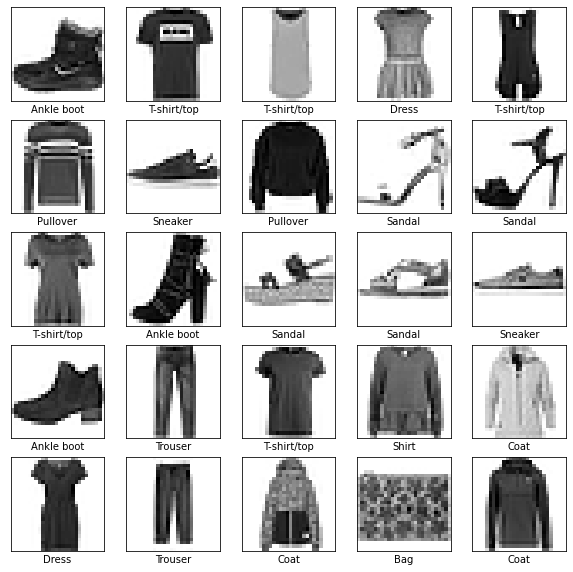

Epoch 1/30
1875/1875 [==============================] - 9s 4ms/step - loss: 3.1261 - accuracy: 0.6873
Epoch 2/30
1875/1875 [==============================] - 8s 5ms/step - loss: 0.6551 - accuracy: 0.7642
Epoch 3/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5822 - accuracy: 0.7872
Epoch 4/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5463 - accuracy: 0.8059
Epoch 5/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5170 - accuracy: 0.8190
Epoch 6/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4975 - accuracy: 0.8274
Epoch 7/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4891 - accuracy: 0.8316
Epoch 8/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4768 - accuracy: 0.8359
Epoch 9/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4655 - accuracy: 0.8409
Epoch 10/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.462

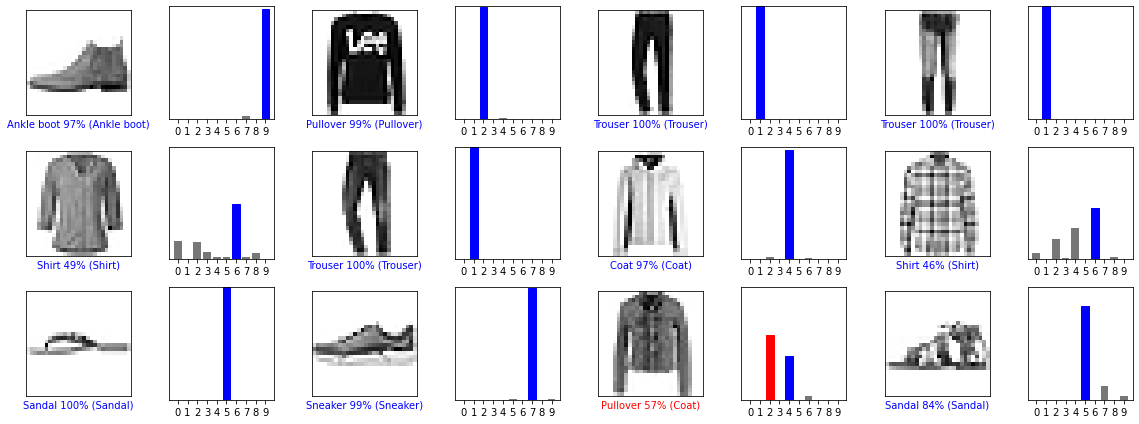

In [ ]:
# -*- coding: utf-8 -*-
"""Untitled2.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/114rXTibrKcr_-O441GFi0Ficr8yixbkD
"""

# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

# Press Shift+F10 to execute it or replace it with your code.
# Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)


def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


# Press the green button in the gutter to run the script.
if __name__ == '__main__':
    fashion_mnist = tf.keras.datasets.fashion_mnist

    (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                   'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    print(train_images.shape)
    print(test_images.shape)
    len(train_labels)
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(train_images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[train_labels[i]])
    plt.show()

    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10)
    ])

    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    model.fit(train_images, train_labels, epochs=30)

    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

    print('\nTest accuracy:', test_acc)

    print("\nClass Names:\n",class_names)

    probability_model = tf.keras.Sequential([model,
                                             tf.keras.layers.Softmax()])
    predictions = probability_model.predict(test_images)

    num_rows = 3
    num_cols = 4
    num_images = num_rows * num_cols
    plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
    for i in range(num_images):
        plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
        plot_image(i, predictions[i], test_labels, test_images)
        plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
        plot_value_array(i, predictions[i], test_labels)
    plt.tight_layout()
    plt.show()
# See PyCharm help at https://www.jetbrains.com/help/pycharm/

2.7.0
11501568/11490434 [==============================] - 0s 0us/step
train_set  (54000, 28, 28)
train_labels  (54000,)
val_set  (6000, 28, 28)
val_labels  (6000,)
test_set:  (10000, 28, 28)
test_labels:  (10000,)


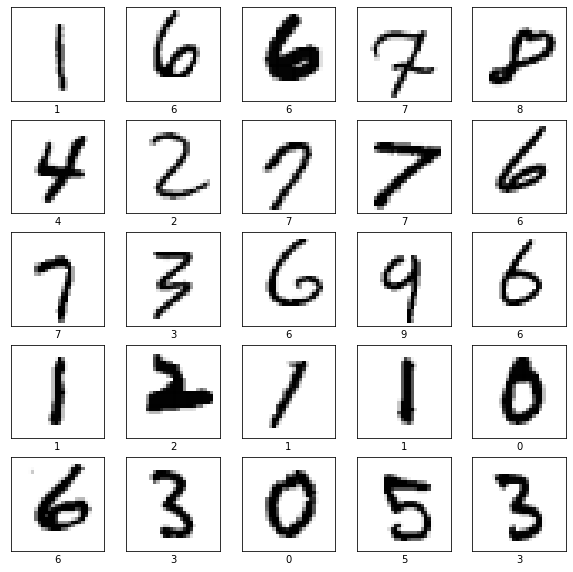

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first (Flatten)             (None, 784)               0         
                                                                 
 second (Dense)              (None, 128)               100480    
                                                                 
 last (Dense)                (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
1688/1688 [==============================] - 5s 3ms/step - loss: 2.9880 - accuracy: 0.8603 - val_loss: 0.5539 - val_accuracy: 0.8820
Epoch 2/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3990 - accuracy: 0.9096 - val_loss: 0.3725 - val_accuracy: 0.9237
Epoch 3/30
1688/1688 [==

KeyboardInterrupt: ignored

In [ ]:
# -*- coding: utf-8 -*-
"""Untitled2.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/114rXTibrKcr_-O441GFi0Ficr8yixbkD
"""

# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


print(tf.__version__)
digits_mnist = tf.keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = digits_mnist.load_data()
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.1, random_state=42)
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']
print("train_set ",train_images.shape)
print("train_labels ",train_labels.shape)
print("val_set ",val_images.shape)
print("val_labels ",val_labels.shape)
print("test_set: ",test_images.shape)
print("test_labels: ",test_labels.shape)
# Press Shift+F10 to execute it or replace it with your code.
# Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.


def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)


def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


def get_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28), name='first'),
        tf.keras.layers.Dense(128, name='second', activation='relu'),
        tf.keras.layers.Dense(10, name='last')
    ])

    model.summary()
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    model.fit(train_images, train_labels, validation_data=(val_images, val_labels), epochs=30)
    return model


# Press the green button in the gutter to run the script.
if __name__ == '__main__':

    len(train_labels)
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(train_images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[train_labels[i]])
    plt.show()

    best_model = get_model()
    best_loss, best_acc = best_model.evaluate(test_images, test_labels, verbose=2)
    for i in range(9):
        model = get_model()
        test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
        if test_acc>best_acc:
            best_model = model
            best_acc = test_acc


    print('\nTest accuracy:', best_acc)

    print("\nClass Names:\n",class_names)

    probability_model = tf.keras.Sequential([best_model,
                                             tf.keras.layers.Softmax()])
    predictions = probability_model.predict(test_images)

    print("============model second layer output:================\n",best_model.get_layer('second').output_shape)
    model2 = tf.keras.Sequential([
        tf.keras.Input(best_model.get_layer('second').output_shape),
        tf.keras.layers.Dense(10, name='last')
    ])
    feature_extractor = tf.keras.Model(
        inputs=best_model.inputs,
        outputs=best_model.get_layer(name='second').output,
    )

    model2.get_layer('last').set_weights(best_model.get_layer('last').get_weights())
    features = feature_extractor(test_images)
    pred_by_features = model2(features)
    print("================test predictions by features:=====================\n", pred_by_features - pred_by_features)

    num_rows = 3
    num_cols = 4
    num_images = num_rows * num_cols
    plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
    for i in range(num_images):
        plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
        plot_image(i, predictions[i], test_labels, test_images)
        plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
        plot_value_array(i, predictions[i], test_labels)
    plt.tight_layout()
    plt.show()
    best_model.save('DIGITS_single_layer')
# See PyCharm help at https://www.jetbrains.com/help/pycharm/

In [ ]:
# -*- coding: utf-8 -*-
"""Untitled4.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/11dgv9vNPccoJc50uf3qe8OrTaSp73FwT
"""

# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


print(tf.__version__)
digits_mnist = tf.keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = digits_mnist.load_data()
#train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.1, random_state=42)
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']
print("train_set ",train_images.shape)
print("train_labels ",train_labels.shape)

print("test_set: ",test_images.shape)
print("test_labels: ",test_labels.shape)
# Press Shift+F10 to execute it or replace it with your code.
# Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.


def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)


def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


def get_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28), name='first'),
        tf.keras.layers.Dense(128, name='second', activation='relu'),
        tf.keras.layers.Dense(10, name='last')
    ])

    model.summary()
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    model.fit(train_images, train_labels, epochs=30)
    return model


# Press the green button in the gutter to run the script.
if __name__ == '__main__':

    len(train_labels)
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(train_images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[train_labels[i]])
    plt.show()

    best_model = get_model()
    best_loss, best_acc = best_model.evaluate(test_images, test_labels, verbose=2)
    for i in range(9):
        model = get_model()
        test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
        if test_acc>best_acc:
            best_model = model
            best_acc = test_acc


    print('\nTest accuracy:', best_acc)

    print("\nClass Names:\n",class_names)

    probability_model = tf.keras.Sequential([best_model,
                                             tf.keras.layers.Softmax()])
    predictions = probability_model.predict(test_images)

    print("============model second layer output:================\n",best_model.get_layer('second').output_shape)
    model2 = tf.keras.Sequential([
        tf.keras.Input(best_model.get_layer('second').output_shape),
        tf.keras.layers.Dense(10, name='last')
    ])
    feature_extractor = tf.keras.Model(
        inputs=best_model.inputs,
        outputs=best_model.get_layer(name='second').output,
    )

    model2.get_layer('last').set_weights(best_model.get_layer('last').get_weights())
    features = feature_extractor(test_images)
    pred_by_features = model2(features)
    print("================test predictions by features:=====================\n", pred_by_features - pred_by_features)

    num_rows = 3
    num_cols = 4
    num_images = num_rows * num_cols
    plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
    for i in range(num_images):
        plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
        plot_image(i, predictions[i], test_labels, test_images)
        plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
        plot_value_array(i, predictions[i], test_labels)
    plt.tight_layout()
    plt.show()
    best_model.save_weights('DIGITS_orig')
# See PyCharm help at https://www.jetbrains.com/help/pycharm/

In [ ]:
# -*- coding: utf-8 -*-
"""Untitled4.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/11dgv9vNPccoJc50uf3qe8OrTaSp73FwT
"""

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(train_images.shape)
print(test_images.shape)
print(tf.__version__)


# Press Shift+F10 to execute it or replace it with your code.
# Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)


def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


def get_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28), name='first'),
        tf.keras.layers.Dense(1024, activation='relu'),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, name='second_to_last', activation='relu'),
        tf.keras.layers.Dense(10, name='last')
    ])

    model.summary()
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    model.fit(train_images, train_labels, epochs=30)
    return model


# Press the green button in the gutter to run the script.
if __name__ == '__main__':

    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(train_images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[train_labels[i]])
    plt.show()

    best_model = get_model()
    best_loss, best_acc = best_model.evaluate(test_images, test_labels, verbose=2)
    for i in range(9):
        model = get_model()
        test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
        print('\nTest accuracy:', test_acc)
        print('\nBest accuracy:', best_acc)
        if test_acc > best_acc:
            print('switch model')
            best_model = model
            best_acc = test_acc

    print('\nTest accuracy:', best_acc)

    print("\nClass Names:\n",class_names)

    probability_model = tf.keras.Sequential([best_model,
                                             tf.keras.layers.Softmax()])
    predictions = probability_model.predict(test_images)

    num_rows = 3
    num_cols = 4
    num_images = num_rows * num_cols
    plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
    for i in range(num_images):
        plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
        plot_image(i, predictions[i], test_labels, test_images)
        plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
        plot_value_array(i, predictions[i], test_labels)
    plt.tight_layout()
    plt.show()
    best_model.save_weights('Fashion_6Layer')
# See PyCharm help at https://www.jetbrains.com/help/pycharm/